<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/ClAuto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
auto=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Auto2.csv')
auto

,Country,Car,MPG,Weight,Drive_Ratio,Horsepower,Displacement,Cylinders
0,U.S.,Buick Estate Wagon,16.9,4.360,2.73,155,350,8
1,U.S.,Ford Country Squire Wagon,15.5,4.054,2.26,142,351,8
2,U.S.,Chevy Malibu Wagon,19.2,3.605,2.56,125,267,8
3,U.S.,Chrysler LeBaron Wagon,18.5,3.940,2.45,150,360,8
4,U.S.,Chevette,30.0,2.155,3.70,68,98,4
5,Japan,Toyota Corona,27.5,2.560,3.05,95,134,4
6,Japan,Datsun 510,27.2,2.300,3.54,97,119,4
7,U.S.,Dodge Omni,30.9,2.230,3.37,75,105,4
8,Germany,Audi 5000,20.3,2.830,3.90,103,131,5
9,Sweden,Volvo 240 GL,17.0,3.140,3.50,125,163,6


In [ ]:
oto=auto.drop(['Country','Car'],axis=1)
oto.head()

,MPG,Weight,Drive_Ratio,Horsepower,Displacement,Cylinders
0,16.9,4.360,2.73,155,350,8
1,15.5,4.054,2.26,142,351,8
2,19.2,3.605,2.56,125,267,8
3,18.5,3.940,2.45,150,360,8
4,30.0,2.155,3.70,68,98,4


In [ ]:
oto.corr()

,MPG,Weight,Drive_Ratio,Horsepower,Displacement,Cylinders
MPG,1.000000,-0.903071,0.417225,-0.871282,-0.786048,-0.805511
Weight,-0.903071,1.000000,-0.687880,0.917220,0.950765,0.916678
Drive_Ratio,0.417225,-0.687880,1.000000,-0.588906,-0.798273,-0.692150
Horsepower,-0.871282,0.917220,-0.588906,1.000000,0.871799,0.863847
Displacement,-0.786048,0.950765,-0.798273,0.871799,1.000000,0.940281
Cylinders,-0.805511,0.916678,-0.692150,0.863847,0.940281,1.000000


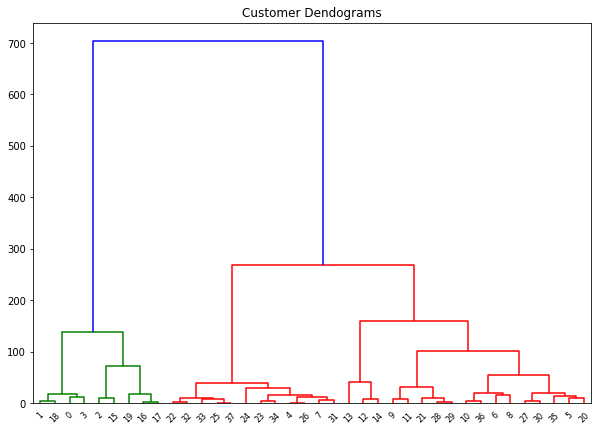

In [ ]:

# huge jump in distance is typically what we're interested in
# if we want to argue for a certain number of clusters. 
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(oto, method='ward'))

Text(0, 0.5, 'Horsepower')

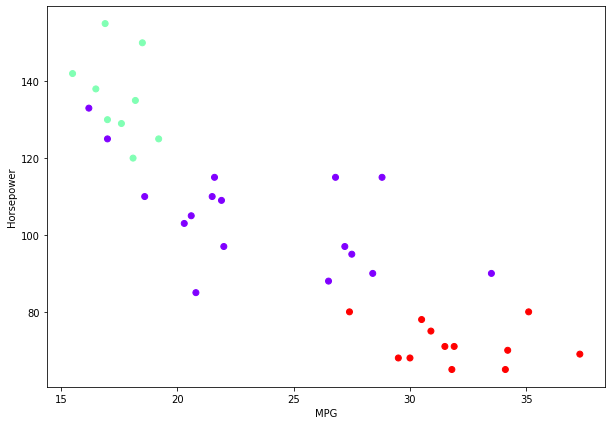

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cl=cluster.fit_predict(oto)
plt.figure(figsize=(10, 7))
plt.scatter(oto['MPG'], oto['Horsepower'], c=cluster.labels_, cmap='rainbow')
plt.xlabel('MPG')
plt.ylabel('Horsepower')

In [ ]:
#Centroids
cl2=pd.DataFrame(cl)
oto2=pd.concat([oto,cl2],axis=1)
oto2.groupby(0).mean().T

,0,1,2
MPG,23.482353,17.500000,32.016667
Weight,2.855059,3.857667,2.127917
Drive_Ratio,3.182941,2.456667,3.444167
Horsepower,104.823529,136.000000,71.666667
Displacement,159.588235,318.000000,96.833333
Cylinders,5.117647,7.777778,4.000000
